#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Temas 6 y 7: Identificación de anomalias y ManiFold learning
##### Alumno: Ibarra Ramírez Sergio </font>

#### Tema 6 Detección  de novedades y valores atípicos 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
## Generamos datos ficticios con distribución normal, escalados y centrados en 20

data_normal1 = np.random.randn(50000) * 20 +20 

##### Ejemplo de detección de anomalias basadas en desviación estandar 

In [3]:
def find_anomalies(data, cut=3):
    ## Donde data es una lista de datos
    ## Y cut =n denota el número de desviaciones estandar para hacer el corte

    ## Inicializamos la lista donde se irán almacenando las anomalias
    anomalies = []

    ## Establecer limites superior e inferoor de datos 'NO anomalos'

    ## Se calcula la desviación estandar de la data dada como parámetro
    data_std = np.std(data)
    ## Se calcula la media de la data dada como parámetro
    data_mean = np.mean(data)

    ## El curte es cut veces la desviación estandar
    anomaly_cut = data_std * cut


    ## Limites inferior y superior es la media + el anomaly_cut
    low_limit = data_mean - anomaly_cut
    upp_limit = data_mean + anomaly_cut

    ## Detección de anomalias

    # Para cada elemento en la lista de data
    for d in data: 
        # Si el valor de dicho elemento es mayor o menor que los limites superior e inferior respectivamente
        if d>upp_limit or d < low_limit:
            # Agregarlo a la lista de anomalias
            anomalies.append(d)
    return anomalies

In [4]:
## Usamos la función find_anomalies
find_anomalies(data_normal1, cut=3)

[83.76161964535444,
 82.43104442219692,
 -47.5208400940048,
 -46.34767530780759,
 82.13979667047855,
 91.35885019029371,
 -43.73601903642563,
 86.75690893754137,
 -40.71556421021005,
 107.76146844299574,
 -41.941089675347065,
 82.32677803097141,
 81.43093835728652,
 -42.904358650491545,
 86.06714522619917,
 82.53640838273475,
 -42.148935724000786,
 -45.67537130733426,
 95.5614532397822,
 81.83333080469598,
 80.64666314987579,
 -46.53341101013247,
 -41.068726664496936,
 80.42936250049111,
 84.23270638758243,
 88.41663700497918,
 82.02574332460864,
 81.94943600321037,
 -43.31529582696245,
 -41.09365693351801,
 93.63532569054408,
 -49.71507404636375,
 94.91654626076284,
 81.16842366796661,
 83.03284400348544,
 -45.55989782257467,
 -40.08768559680428,
 82.51628852205471,
 -44.54108882836934,
 94.41366714146581,
 -43.49717188961223,
 -40.26027885610445,
 -47.76794007513979,
 -40.54724506085091,
 -46.789646565993664,
 86.43009588982163,
 -49.64323695832044,
 82.32461432245061,
 -42.184763852

Graficamos nuestro conjunto de datos original

- Primero con gráffica de histograma 

(array([4.0000e+01, 4.2100e+02, 2.7790e+03, 9.1550e+03, 1.5849e+04,
        1.3940e+04, 6.2650e+03, 1.3800e+03, 1.5800e+02, 1.3000e+01]),
 array([-60.89033103, -44.02515108, -27.15997113, -10.29479118,
          6.57038876,  23.43556871,  40.30074866,  57.1659286 ,
         74.03110855,  90.8962885 , 107.76146844]),
 <BarContainer object of 10 artists>)

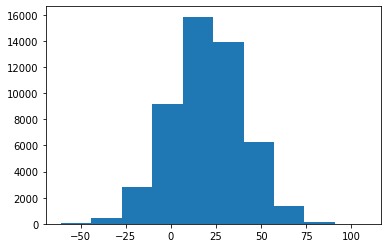

In [5]:
plt.hist(data_normal1)

Veamos tambien la gráfica de quantil-quantil

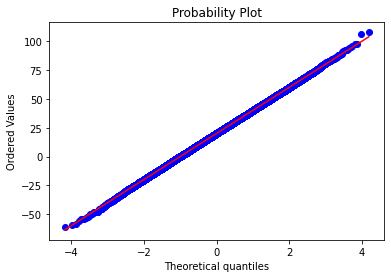

In [6]:
import pylab 
import scipy.stats as stats
stats.probplot(data_normal1, dist='norm', plot=pylab)
pylab.show()

Prueba de normalidad de los datos con la prueba de shapiro cuyo H0 indica que la variable SI ES NORMAL 

In [7]:
from scipy.stats import shapiro
est, p_value = shapiro(data_normal1)
print(p_value)

0.950758159160614


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [8]:
print(est)

0.9999701976776123


##### Ejemplo de detección de anomalias basadas en Rango Interquartilico y box-plot

In [9]:
## BOXPLOT 
import pandas as pd
import numpy as no 
import matplotlib.pyplot as plt 

Generaremos de nuevo un conjunto de datos para el caso de detección de valores anomalos por Rango Interquartilico 

In [10]:
data_normal2 = np.random.randn(50000) * 20 +20 

## Convertimos los números aleatorios en un DF 
data_normal2 = pd.DataFrame(data_normal2, columns=['random'])
data_normal2.head(5)

,random
0,27.122800
1,42.557973
2,31.380466
3,17.832263
4,51.247667


Vamos a usar el blox plot para el caso de data_normal2

<AxesSubplot:>

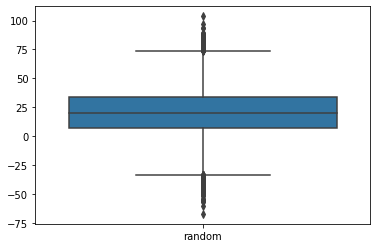

In [11]:
import seaborn as sns 
sns.boxplot(data_normal2)

Ahora vamos a usar el boxplot para datos no normales

In [12]:
url = 'http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/stocks.csv'
stocks = pd.read_csv(url, header='infer')
stocks.head(5)

,Date,MSFT,F,BAC
0,1/3/2007,29.860001,7.51,53.330002
1,1/4/2007,29.809999,7.70,53.669998
2,1/5/2007,29.639999,7.62,53.240002
3,1/8/2007,29.930000,7.73,53.450001
4,1/9/2007,29.959999,7.79,53.500000


Y aplicamos ahora el box plot para estos datos de stocks

<AxesSubplot:>

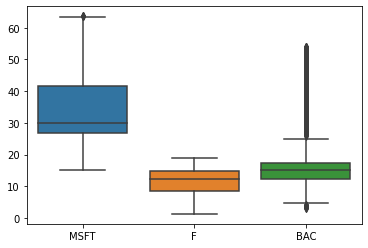

In [13]:
sns.boxplot(stocks)

Vamos a aplicar nosotros el algoritmo de Rango Interquartilico 

In [14]:
import numpy as np 
from sklearn.datasets import make_blobs 

##Se usa una especie de 'variable muda _'

X,_ = make_blobs (n_samples=300, n_features=2, centers=1, shuffle=True, random_state=1)

##Función para detectar anomalias 'usando el rango Inter'

def anomaly_indexes(X):

    ## Se definen los Quartiles
    Q1,Q3 = np.percentile(X, [25,75])
    ## Se calcula el rango interquartilico
    IQR = Q3-Q1

    ## Se definen los limites superior e inferior
    low_limit = Q1 -1.5*IQR
    upp_limit = Q3 +1.5*IQR

    ## Se detectan las anomalias para cada valor de X siendo mayor o menor a lso limites establecidos
    ## NOS RETORNA LOS INDICES de los valores que cumplan esa condición 
    anomalies = np.where((X<low_limit)| (X>upp_limit))
    return anomalies 

In [15]:
print('Indices de las anomalies en x:', anomaly_indexes(X[:,0]))
print('Indices de las anomalies en x:', X[anomaly_indexes(X[:,0])])

Indices de las anomalies en x: (array([ 17,  87, 128, 241, 263], dtype=int64),)
Indices de las anomalies en x: [[-4.16600056  2.29232595]
 [-4.45264491  6.34401868]
 [-4.07306291  2.62892349]
 [ 0.8687658   4.15785509]
 [ 1.37129721  5.23107449]]


Uso de la función anomaly_indexes para el caso de stocks['BAC']

In [16]:
anomaly_indexes(stocks['BAC'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

##### Density Base Spatial Clustering para deteccion de anomalias 

In [17]:
import numpy as np
from sklearn.cluster import DBSCAN
np.random.seed(1)
data_para_DBscan = np.random.randn(50000,2)*20 + 20 

Se aplica el algoritmo de DBscan para detección de anomalias, definiendo min_samples (umbral de puntos en cluster) y eps (tamaño de clusters)

In [18]:
anomalies_dbscan = DBSCAN(min_samples=2, eps=3)
clusters_dbscan = anomalies_dbscan.fit_predict(data_para_DBscan)

## Se obtiene aquellos puntos o clusters con solo 1 etiqueta 
list(clusters_dbscan).count(-1)

94

Otro ejemplo de uso de algoritmo de detección de anomalias 

In [19]:
from sklearn.cluster import DBSCAN 
from collections import Counter 

In [20]:
df_para_DBscan = pd.read_csv("https://bit.ly/3arouNg")
df_para_DBscan.head(5)

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Solo se usarán las colunmas fixed acidity y volatile acidity 

In [21]:
data_para_DBscan = df_para_DBscan.iloc[:,1:3]
data_para_DBscan.head(5)

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23


In [22]:
dbsacn_acidity = DBSCAN(eps=0.2, min_samples=20).fit(data_para_DBscan)
dbsacn_acidity

DBSCAN(eps=0.2, min_samples=20)

In [23]:
print(Counter(dbsacn_acidity.labels_))
anom_acidity = pd.DataFrame(data_para_DBscan)
print(anom_acidity[dbsacn_acidity.labels_==-1])

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


Vamos a graficar el resultado de DBSCAN para acidity 

Text(0.5, 1.0, 'DBSCAN aplicado a datos de acidity')

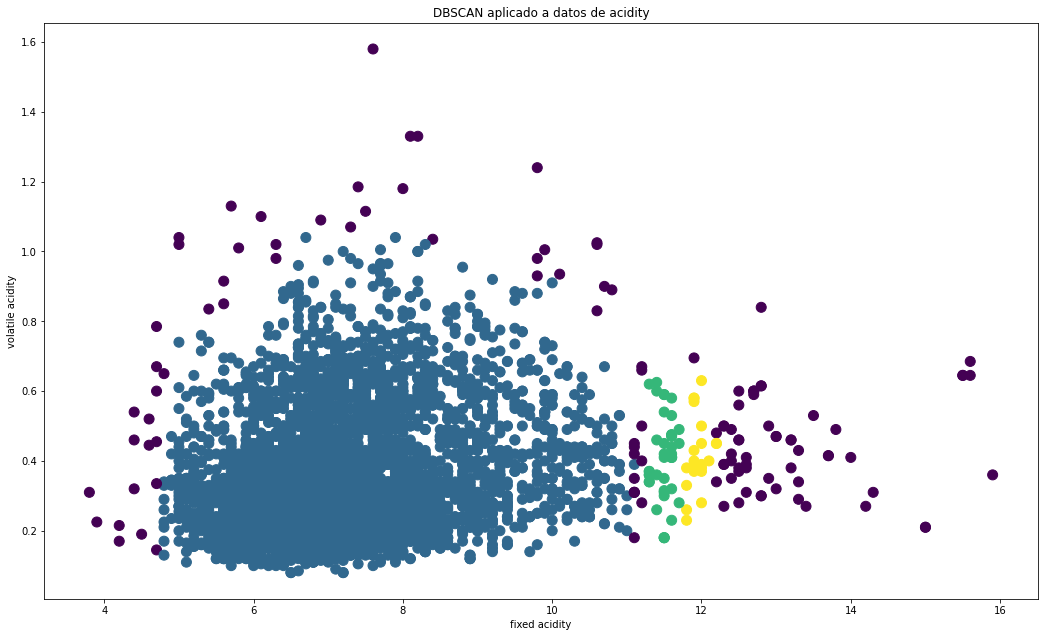

In [24]:
fig = plt.figure()
##Se define X,y Iniciales   ,  X,Y finales
ax = fig.add_axes([0.1,0.1,2.3,2])
colors = dbsacn_acidity.labels_
## Se grafican los valores de la primer y la segunda columna 
ax.scatter(data_para_DBscan.iloc[:,0].values,data_para_DBscan.iloc[:,1].values, c=colors, s=100)
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
plt.title('DBSCAN aplicado a datos de acidity')

#### Tema 7 Manifold Learning 

In [25]:
import matplotlib 
import scipy 
from scipy.spatial.distance import pdist, squareform 
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

Se define la función que aplica el Kernel PCA 

In [26]:
def rbf_kpca (X, gamma, n_components):
    ##1. CREACIÓN DE LA MATRIZ DE DISTANCIA O DE NUCLEOS

    ##Se calculan las distancias cuadraticas entre todas las parejas de puntos
    ## Obtenemos una lista de distancias
    sq_dists = pdist(X,'sqeuclidean') 
    ## Convertimos la lista a una matriz de distancias
    mat_sq_dists = squareform(sq_dists)
    ## Vamos a aplicar la exponencial para obtener la lalamda matriz de nueclos K 
    ## K es entonces la matriz nxn de distancias
    K = np.exp(-gamma * mat_sq_dists)


    ##2. Centrar la Matriz K de nucleos 
    N = K.shape[0]
    ## Esta es la que se llama 1n 
    one_n = np.ones((N,N)) /N 
    ## Ahora si aplicamos como tal el centrado de la matriz K 
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)


    ## 3. Obtenemos los eigenvectores y valores de la matriz centrada
    eigenvals, eigenvecs = eigh(K) ## Devuelve los eigenvecs en forma ascendente
    ## Se 'invierten los eigenvecs' para obtenerr solos k primeros (que serian los Princpal Components variables)
    eigenvals, egenvecs = eigenvals[::-1], eigenvecs[:,::-1]

    ##Eigenvectors
    alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)]) 

    ##Eigenvalues
    lamdas = np.column_stack([eigenvals[i] for i in range(n_components)]) 
    return alphas, lamdas

Importamos el conjunto NO LINEALMENTE SEPARABLE DE make_moons

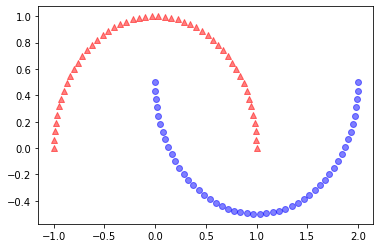

In [27]:
## Generador de medias lunas 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

#Todos los x cuyo valor de y seea cero 0 uno y la prieimer y segunda columna de eso 
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha =0.5)

plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha =0.5)

##### Vamos a aplicar el 'PCA NORMAL' al conjunto make_moons

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_normal = pca.fit_transform(X)
X_pca_normal

array([[-0.2795509 ,  0.34303617],
       [-0.42251533, -0.6083743 ],
       [-1.11143524, -0.31056455],
       [ 0.91009606,  0.4682757 ],
       [ 0.01356142, -0.5194961 ],
       [-0.55258909, -0.08452989],
       [-0.40741947,  0.19974865],
       [ 0.55258909,  0.08452989],
       [-1.0649998 , -0.3547569 ],
       [-0.44363426,  0.14685533],
       [ 0.61319152,  0.58547722],
       [-0.106304  , -0.5647979 ],
       [-0.79597451, -0.52655299],
       [ 0.1800669 , -0.42380069],
       [ 0.67533755,  0.56975829],
       [ 1.38981501, -0.25483572],
       [-0.8539697 , -0.49924418],
       [ 1.32278775, -0.00802077],
       [ 0.36789019, -0.250213  ],
       [-0.73634878, -0.55008994],
       [ 1.23247827,  0.16146635],
       [-1.32278775,  0.00802077],
       [ 0.35841461,  0.60781552],
       [ 0.96412295,  0.43377483],
       [ 1.0649998 ,  0.3547569 ],
       [-1.37903292,  0.19164584],
       [-1.23247827, -0.16146635],
       [-0.23110388,  0.38501356],
       [ 0.47638576,

Se muestra como el PCA NO ES LINEALMENTE SEPARABLE 

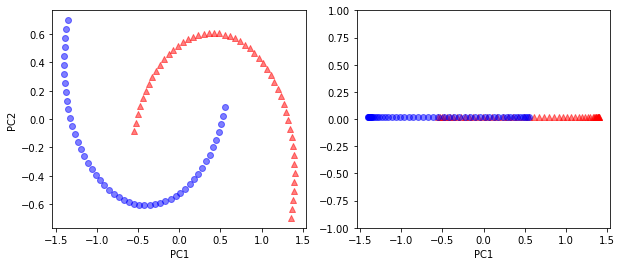

In [29]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca_normal[y==0,0], X_pca_normal[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca_normal[y==1,0], X_pca_normal[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_pca_normal[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca_normal[y==1,0], np.zeros((50,1)) +0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()

Ahora si vamos a aplicar el Kernel PCA que habiamos cosntruido anteriormente

In [30]:
## La X_pca_K almacena las alfas, y la l las lamdas 
X_pca_K,l = rbf_kpca(X, gamma=15, n_components=2)
X_pca_K

array([[-9.99164520e-02,  2.37866748e-03],
       [-1.00506911e-01,  2.24770790e-01],
       [-1.00562363e-01,  1.78220395e-01],
       [-9.96176109e-02,  2.42105705e-02],
       [-9.98162928e-02, -1.03275159e-01],
       [-9.99994521e-02, -2.38910659e-04],
       [-1.00018829e-01, -7.95025543e-04],
       [-9.99995057e-02, -2.30170492e-04],
       [-9.93908296e-02, -1.95771704e-01],
       [-9.99899592e-02,  2.67536165e-05],
       [-1.00435334e-01, -2.60300032e-02],
       [-9.97316426e-02, -1.42165492e-01],
       [-1.00693071e-01,  2.49504310e-01],
       [-1.00084348e-01,  5.08129143e-02],
       [-9.95684292e-02,  2.58774053e-02],
       [-9.99765741e-02,  1.48266928e-03],
       [-9.93023485e-02, -2.44167271e-01],
       [-9.99005574e-02,  6.68392830e-03],
       [-1.00015494e-01,  9.82548522e-03],
       [-9.93190746e-02, -2.52965545e-01],
       [-1.00188071e-01, -1.29402988e-02],
       [-1.00211903e-01,  6.59185844e-02],
       [-1.00421283e-01, -2.19607818e-02],
       [-1.

Se grafica el resultado de X_pca_K

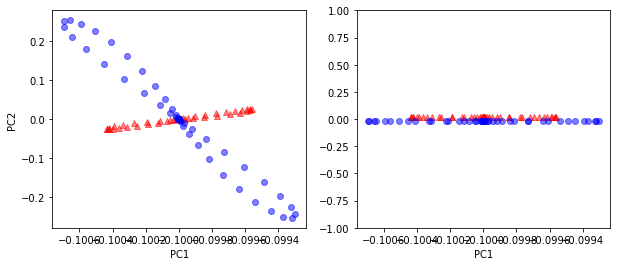

In [31]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca_K[y==0,0], X_pca_K[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca_K[y==1,0], X_pca_K[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_pca_K[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca_K[y==1,0], np.zeros((50,1)) -0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()

Vamos a variar el valor de gamma 

In [ ]:
X_pca_K,l = rbf_kpca(X, gamma=10, n_components=2)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca_K[y==0,0], X_pca_K[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca_K[y==1,0], X_pca_K[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_pca_K[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca_K[y==1,0], np.zeros((50,1)) +0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()

#### Ejemplo de implementacion de Manifold con linrerias de sk.learn 

Importamos los datos 

In [32]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)

Creamos y entrenamos el modelo PCA Manifold de sklearn

In [33]:
## Con PCA Manifold de sklearn 

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X) 
X_kpca

array([[-0.19813012, -0.32893502],
       [ 0.35038479, -0.18363537],
       [ 0.33278344,  0.27303406],
       [-0.35861834,  0.13787481],
       [ 0.27947114, -0.34646117],
       [-0.03231269, -0.09992664],
       [-0.1402958 , -0.26393352],
       [ 0.03231269, -0.09992664],
       [ 0.34107928,  0.24384492],
       [-0.11997571, -0.23460267],
       [-0.36284598, -0.06785758],
       [ 0.30536789, -0.32022674],
       [ 0.36407185,  0.05708143],
       [ 0.23323782, -0.35027498],
       [-0.36450698, -0.02649036],
       [-0.19110122,  0.31758295],
       [ 0.3619725 ,  0.09811911],
       [-0.25930323,  0.35789694],
       [ 0.16016551, -0.28967584],
       [ 0.36491625,  0.01534889],
       [-0.30089306,  0.33640228],
       [ 0.25930323,  0.35789694],
       [-0.34376065, -0.21775298],
       [-0.35401236,  0.17577444],
       [-0.34107928,  0.24384492],
       [ 0.20934501,  0.33483988],
       [ 0.30089306,  0.33640228],
       [-0.21607303, -0.34193845],
       [ 0.09932993,

Graficamos el reusltado del PCA Kernel del sklearn

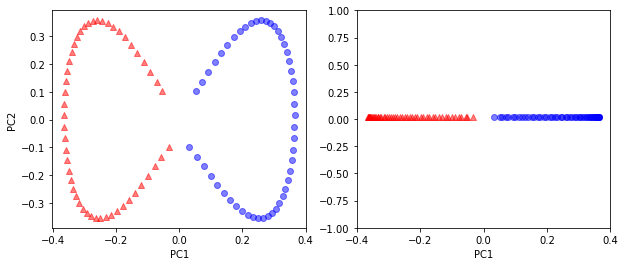

In [34]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1)) +0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()